In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [18]:
train = pd.read_csv('/content/train.csv')

In [19]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [21]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


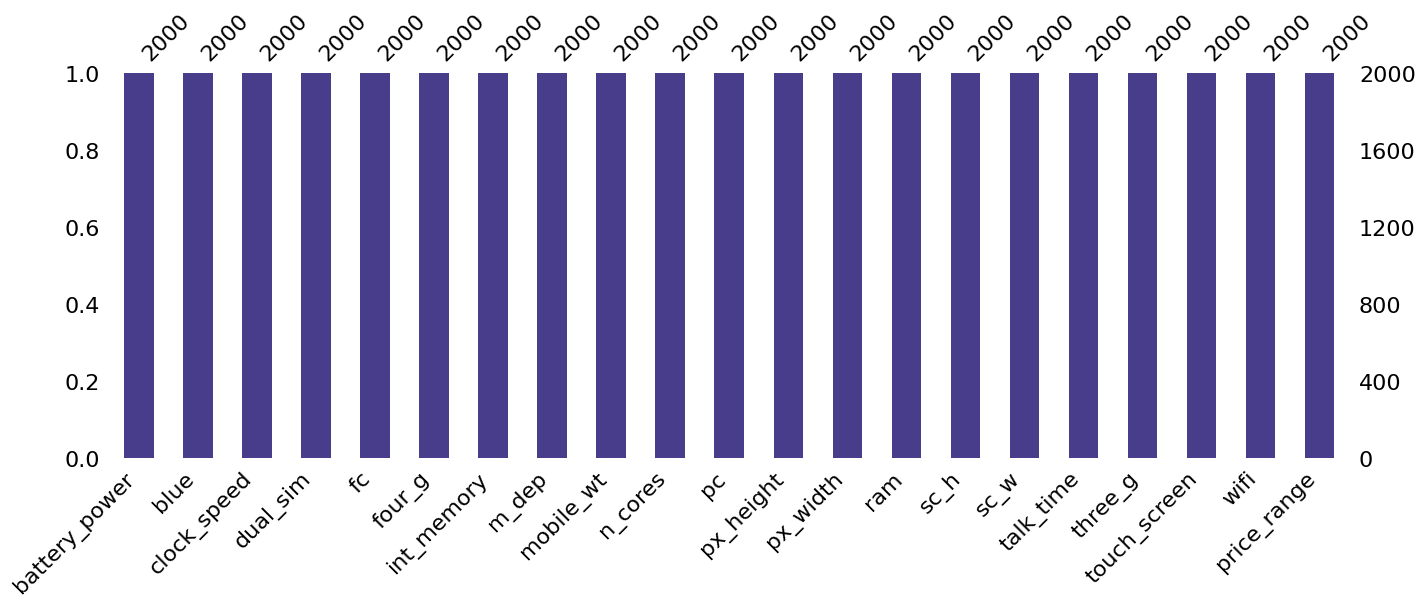

In [22]:
msno.bar(train, figsize = (16,5),color = "#483D8B")
plt.show()

In [23]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'battery_power' has '1094' unique values
Feature 'blue' has '2' unique values
Feature 'clock_speed' has '26' unique values
Feature 'dual_sim' has '2' unique values
Feature 'fc' has '20' unique values
Feature 'four_g' has '2' unique values
Feature 'int_memory' has '63' unique values
Feature 'm_dep' has '10' unique values
Feature 'mobile_wt' has '121' unique values
Feature 'n_cores' has '8' unique values
Feature 'pc' has '21' unique values
Feature 'px_height' has '1137' unique values
Feature 'px_width' has '1109' unique values
Feature 'ram' has '1562' unique values
Feature 'sc_h' has '15' unique values
Feature 'sc_w' has '19' unique values
Feature 'talk_time' has '19' unique values
Feature 'three_g' has '2' unique values
Feature 'touch_screen' has '2' unique values
Feature 'wifi' has '2' unique values
Feature 'price_range' has '4' unique values


In [24]:
cat_features=list()
num_features=list()
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

In [25]:
cat_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [26]:
num_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

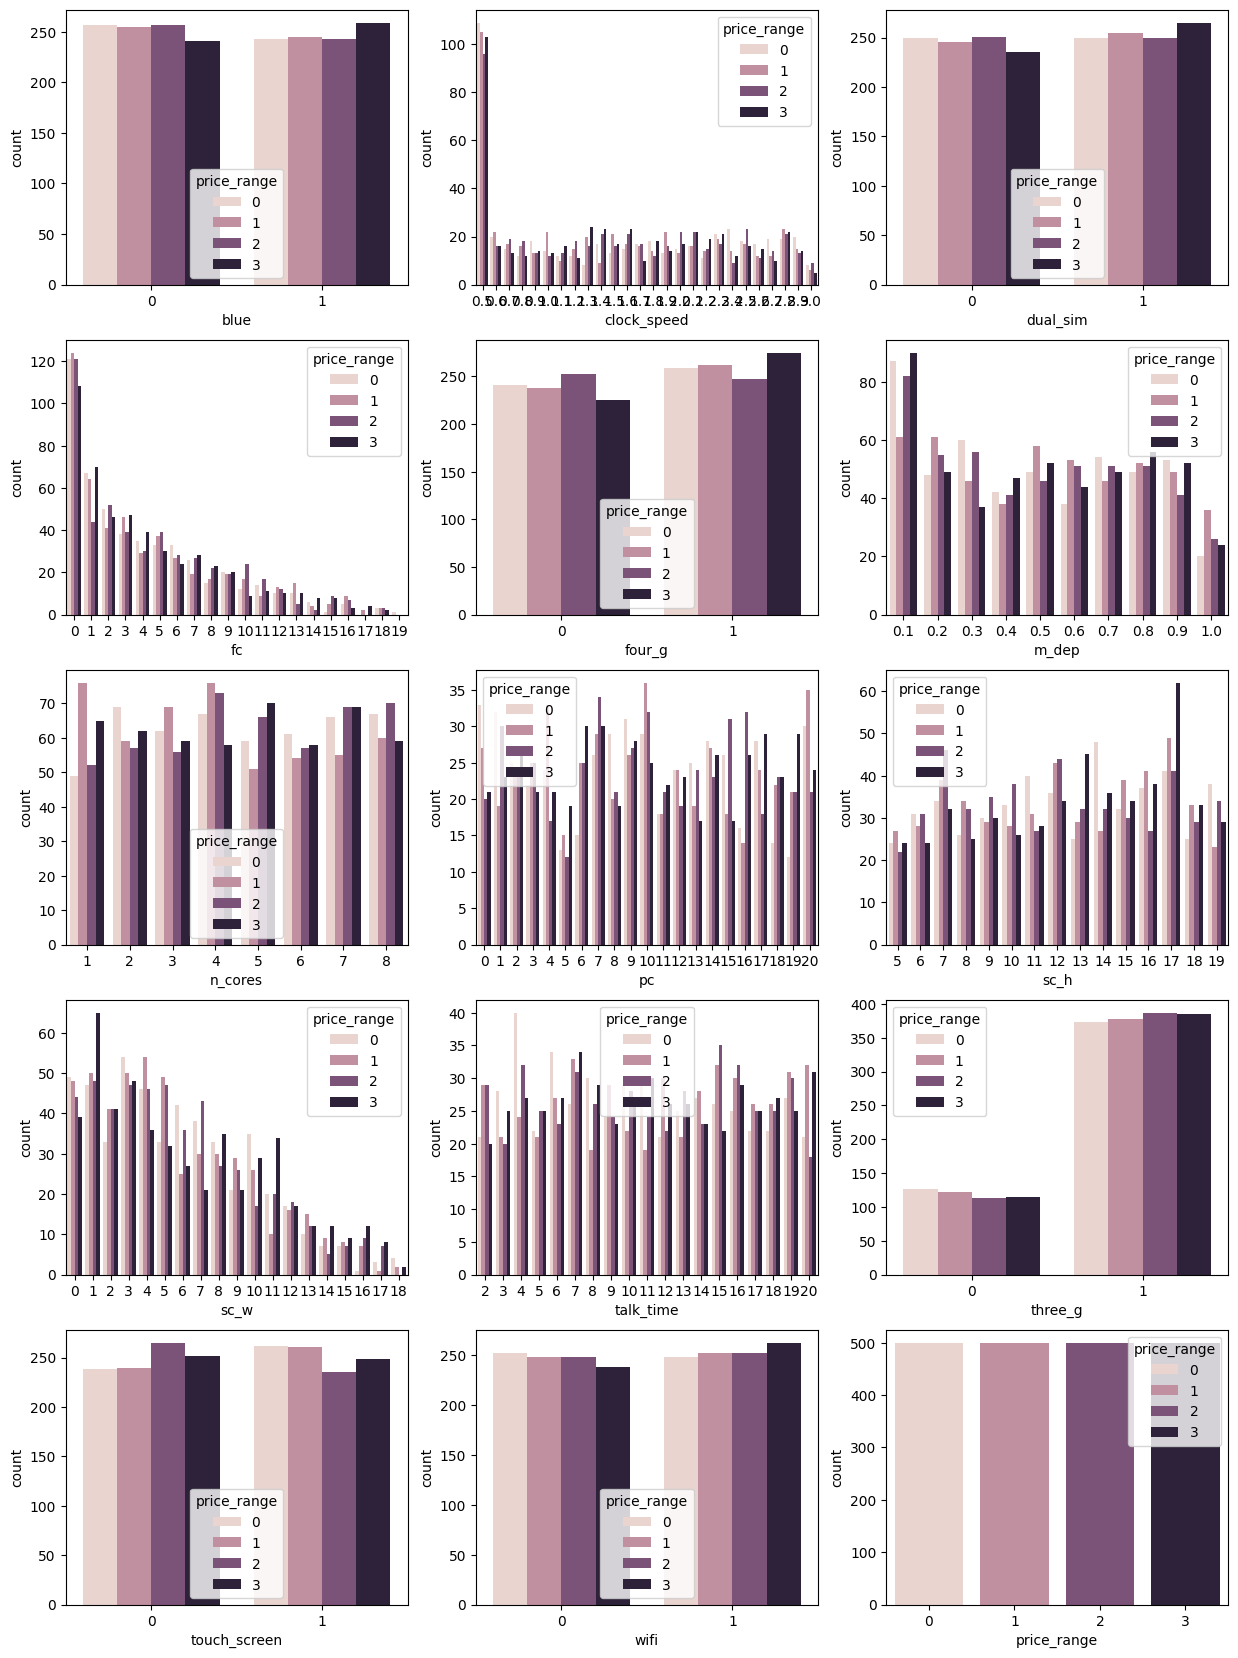

In [27]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = train,hue='price_range')
    i +=1


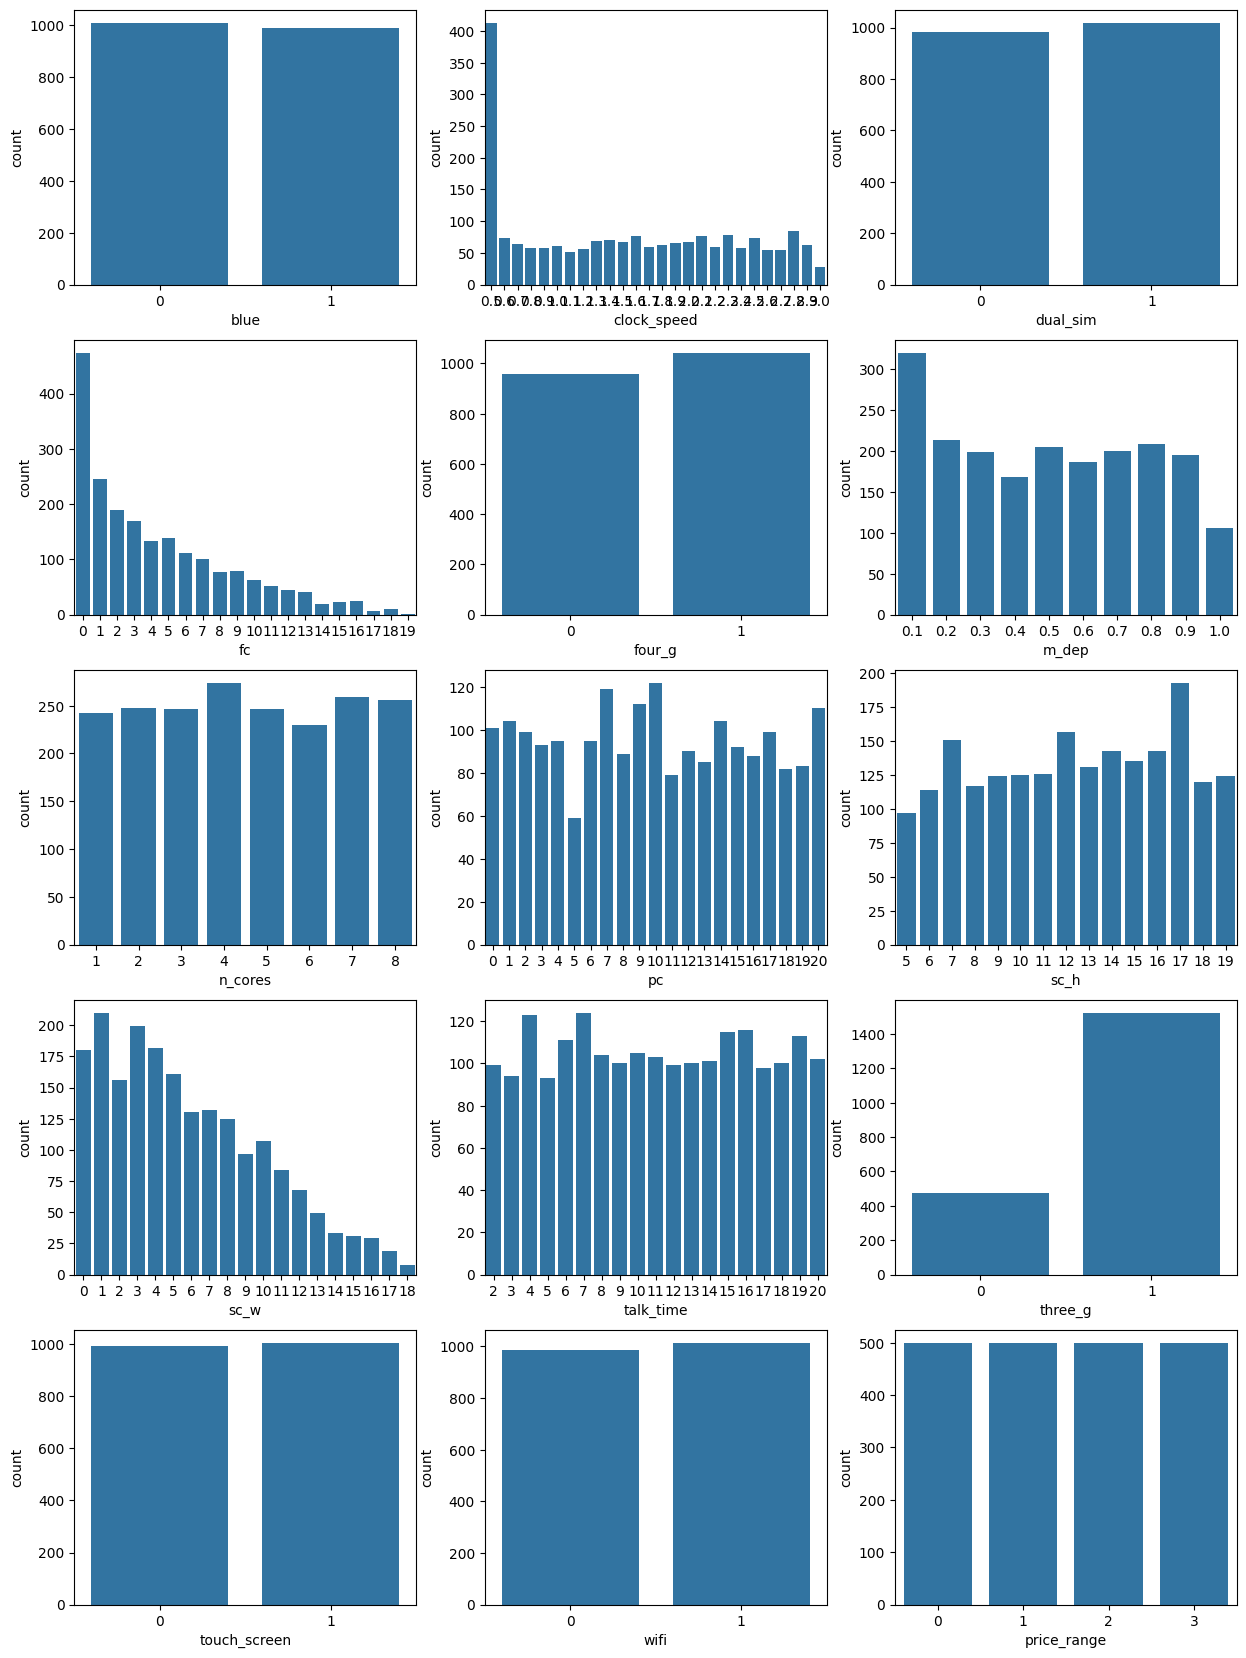

In [28]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = train)
    i +=1

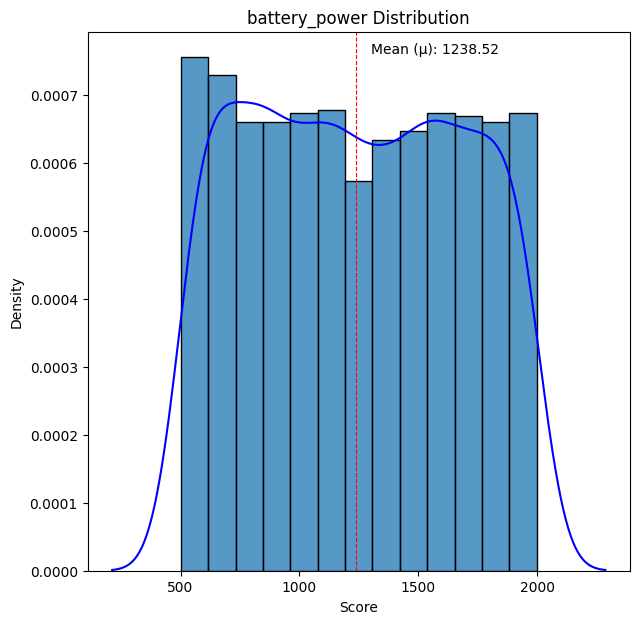

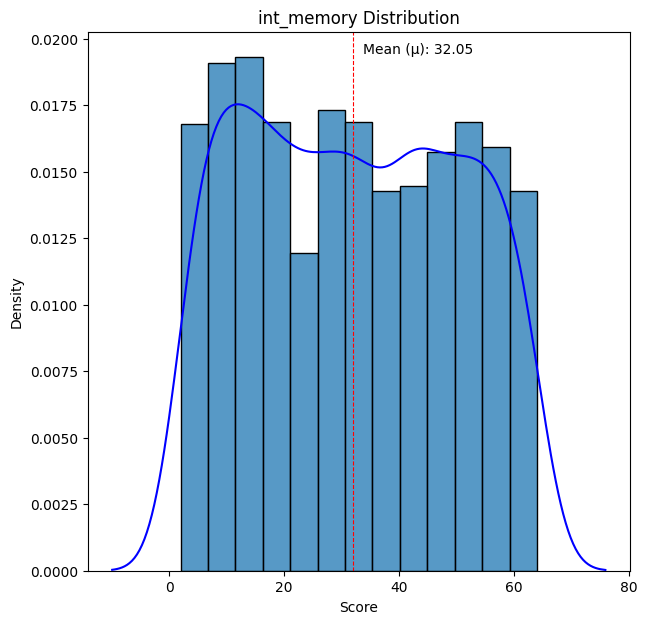

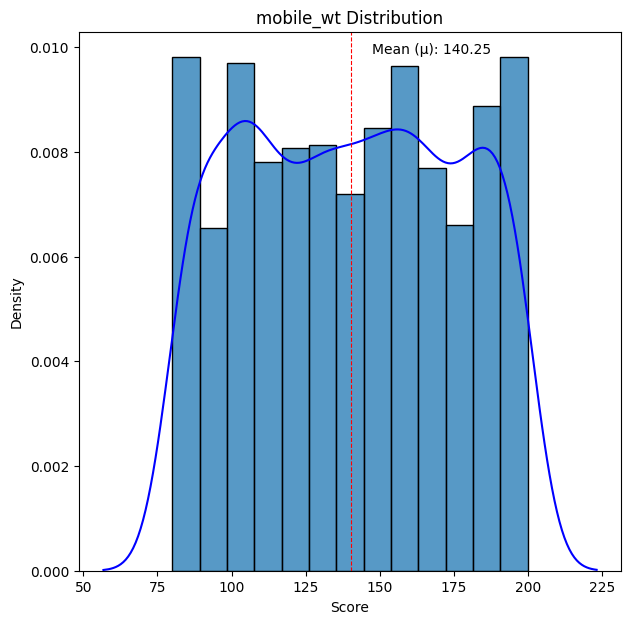

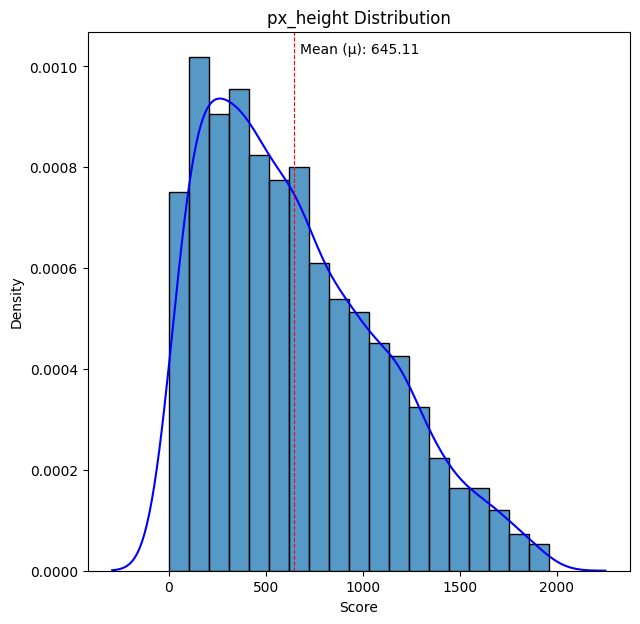

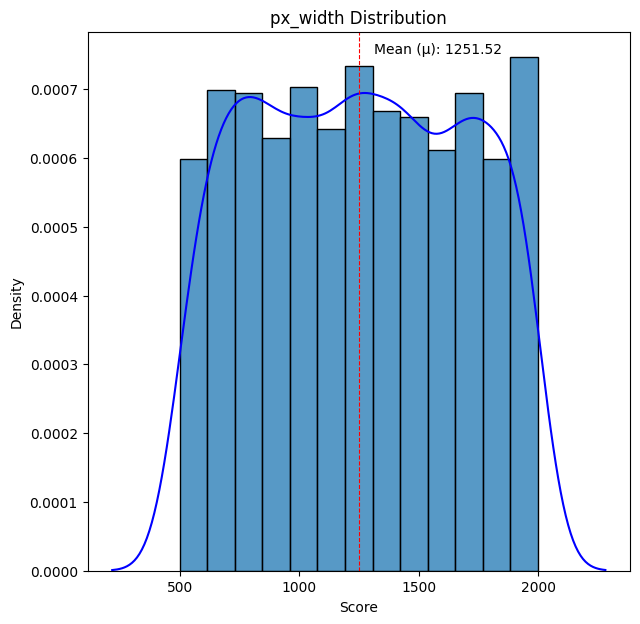

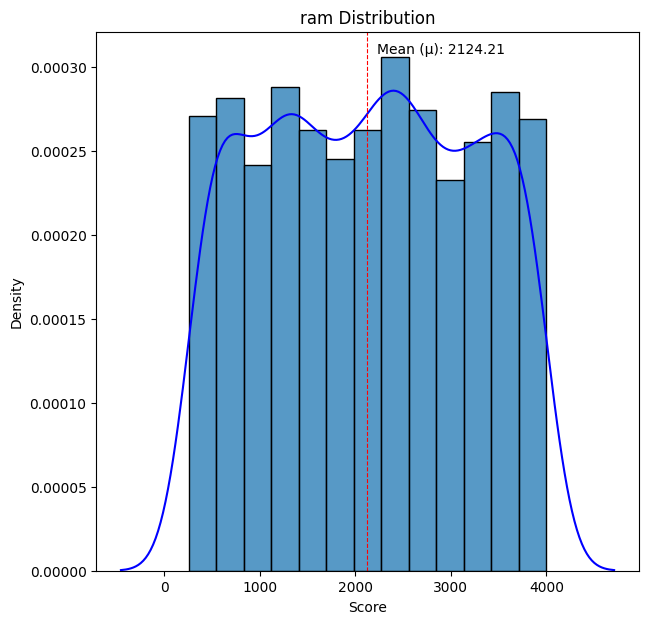

In [29]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density')
  sns.kdeplot(train[column_name], color='blue')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

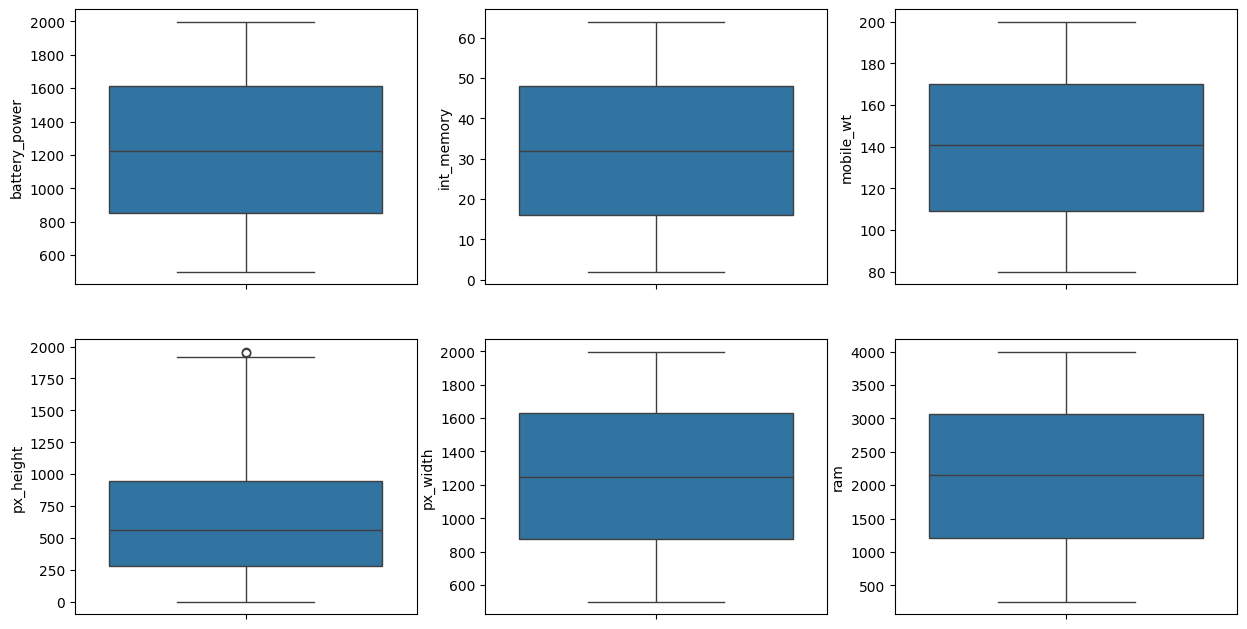

In [30]:
i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

In [31]:
correlation = train.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64 



Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')


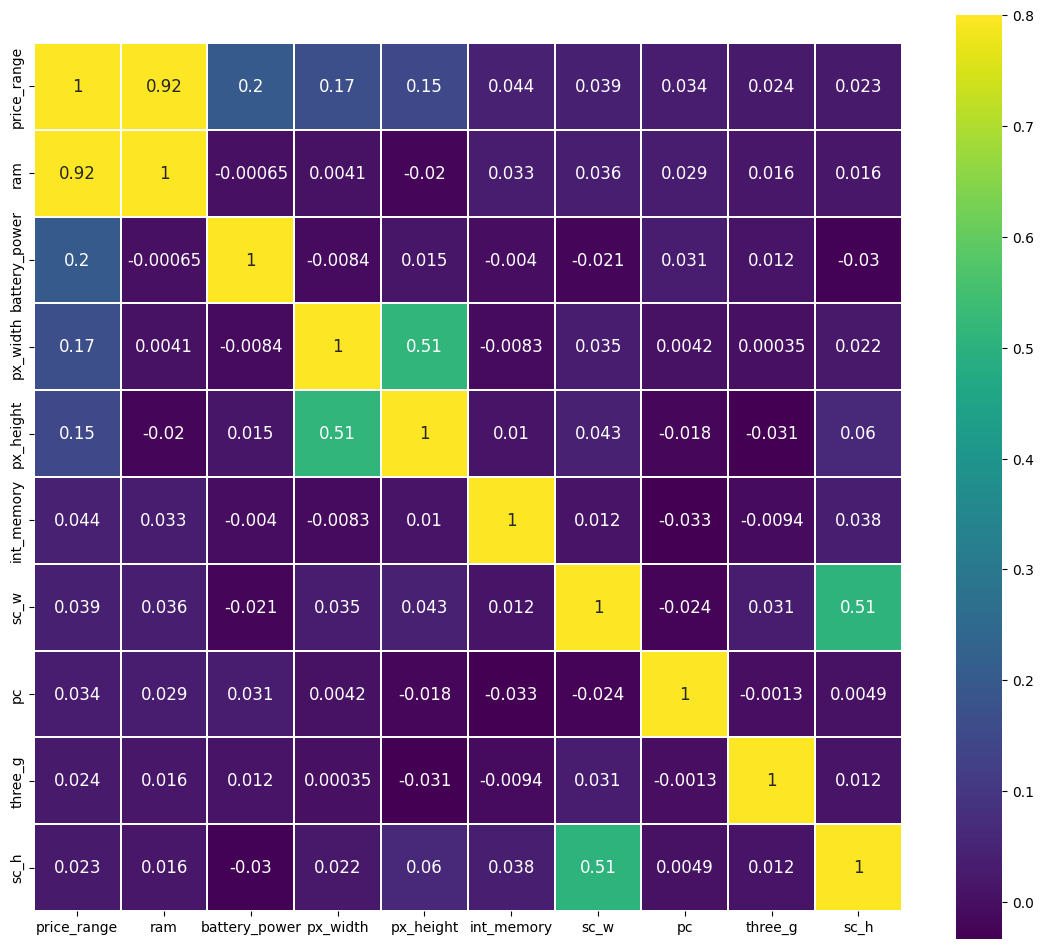

In [32]:
k= 10
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [34]:
X=train.drop('price_range',axis=1)
y=train['price_range']

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.88      0.88        91
           2       0.80      0.88      0.84        92
           3       0.95      0.88      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

------------------------------ 

mo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model: LogisticRegression()
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400

------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
             